# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [929]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))
dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

genre = "all"  # "all" by default. To focus on a specific genre change the value, cfr "s_senses" file

s_senses = io.open(dir_expert+"/senses_15281.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15/15281/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/params_v8.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

i = 0
for line in parameter_file.readlines():
    i+=1
    if i == 4:
        line = line.split("\t")
        window_size = int(line[1])
        print("Window size:",window_size,type(window_size))
        
    if i == 13:
        line = line.split("\t")
        iterations = int(line[1])
        print("Iterations:",iterations,type(iterations))
        
    if i == 14:
        line = line.split("\t")
        start_time = int(line[1])
        print("Start time:",start_time,type(start_time))
        
    if i == 15:
        line = line.split("\t")
        end_time = int(line[1])
        print("End time:",end_time,type(end_time))
    
    if i == 16:
        line = line.split("\t")
        time_interval = int(line[1])
        print("Time interval:",time_interval,type(time_interval))

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 15281
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_15281.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15/15281/output.dat' mode='r' encoding='UTF-8'>
_v8.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/15281_v8.txt
Window size: 5 <class 'int'>
Iterations: 1000 <class 'int'>
Start time: -800 <class 'int'>
End time: 400 <class 'int'>
Time interval: 100 <class 'int'>


93

In [1183]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time+1):
    if temp_start_time + time_interval < end_time+1:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + 1

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time+1):
        
        if i >= int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                
#slice_years[period].append(latest_i+1)  #  in case we have a slice that ends on a century
                    
        
        
    

print(slice_years)

1
2
3
4
5
6
7
8
9
10
11
12
100
-800 400
{0: [-800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -770, -769, -768, -767, -766, -765, -764, -763, -762, -761, -760, -759, -758, -757, -756, -755, -754, -753, -752, -751, -750, -749, -748, -747, -746, -745, -744, -743, -742, -741, -740, -739, -738, -737, -736, -735, -734, -733, -732, -731, -730, -729, -728, -727, -726, -725, -724, -723, -722, -721, -720, -719, -718, -717, -716, -715, -714, -713, -712, -711, -710, -709, -708, -707, -706, -705, -704, -703, -702, -701], 1: [-700, -699, -698, -697, -696, -695, -694, -693, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -678, -677, -676, -675, -674, -673, -672, -671, -670, -669, -668, -667, -666, -665, -664, -663, -662, -661, -660, -659, -658, -657, -656, -655, -654, -653, -652, -651, -650, -649, -648, -647, -646, -645, -644, -643, -6

## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

In [1184]:
# For each target word, we have a list of senses  s (given by the expert)
# For each target word, we have a list of senses k (given by the model)
# This Q consists in matching s and k, and doing so in a confident way --> confidence score

for each k:
    for each s:
        create conf(k,s)

# What is conf(k,s)?
        conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))/10 WHERE
    
            px = probability of word wx 
                
                and
            
            match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 
            
                    or 
                            0 if w_is_not_associated_to_s
                
# Once we have gone through all s for one k, we have to choose the best k for s. How? (TBD, cfr Valerio and Barbara)

# Once all ks have been assigned to all ss (or NA), we can calculate a general confidence score for the model.
# One easy way to do that: 

conf_score_model = number_of_non_NA/k

SyntaxError: invalid syntax (<ipython-input-1184-82fa54601c9a>, line 5)

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [1185]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0


for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                expert_senses.append(sense)    
            else:
                expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
        else:
             expert_senses.append("NA")
                
    else: # specific genre only
        
        if cells[1] == genre:

            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    expert_senses.append(sense)    
                else:
                    expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
            else:
                 expert_senses.append("NA")


#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        
        
        
        cells = line.split("\t") # splitting on tabs
        
        if genre == "all":   # all genres
            
            if int(cells[12]) == 1:  # senses inferred from collocates
                if cells[11] == expert_senses[i]:      # we store all words for one sense 


                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_ids_window.append(list_of_ids[n])

                        except IndexError: # if there isn't, too bad
                            sentences_smaller_than_window_size += 1

                    for word_id in list_of_ids_window:
                        if int(cells[12]) == 1:


                            if cells[11] == expert_senses[i]:  

                                dict_of_words[expert_senses[i]].append(word_id)                    

                        list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                # if the sense is "w", the collocates are put in the "NA words"

                if cells[11] == "w":
                    #print("W")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                            dummy_counter +=1

            else:  # words that are in "non collocates senses"
                #print("NON COLOC")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                #print(sentence_of_ids)
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                #print(index_of_target)
                list_of_ids_window = list()
                #print(index_of_target-window_size,index_of_target+window_size+1)
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account
                        #print(list_of_ids_window)
                        #print(list_of_ids[n])
                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                            dummy_counter +=1
                #print(list_of_NA_words)
                
        else:
            
            if cells[1] == genre:
                if int(cells[12]) == 1:  # senses inferred from collocates
                    if cells[11] == expert_senses[i]:      # we store all words for one sense 


                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_ids_window.append(list_of_ids[n])

                            except IndexError: # if there isn't, too bad
                                sentences_smaller_than_window_size += 1

                        for word_id in list_of_ids_window:
                            if int(cells[12]) == 1:


                                if cells[11] == expert_senses[i]:  

                                    dict_of_words[expert_senses[i]].append(word_id)                    

                            list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                    # if the sense is "w", the collocates are put in the "NA words"

                    if cells[11] == "w":
                        #print("W")
                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_NA_words.append(list_of_ids[n])
                                list_of_all_words.append(list_of_ids[n])
                            except IndexError:
                                dummy_counter +=1

                else:  # words that are in "non collocates senses"
                    #print("NON COLOC")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    #print(sentence_of_ids)
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    #print(index_of_target)
                    list_of_ids_window = list()
                    #print(index_of_target-window_size,index_of_target+window_size+1)
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account
                            #print(list_of_ids_window)
                            #print(list_of_ids[n])
                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                                dummy_counter +=1
                    #print(list_of_NA_words)





            
            
            
            
            
            
            
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can put that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['harmonia-4.3α', 'harmonia-4.4', 'harmonia-3', 'harmonia-1', 'harmonia-4.1', 'harmonia-5', 'harmonia-4.5', 'harmonia-4.3β', 'harmonia-4.3', 'harmonia-4.6', 'NA']
ITERTOOLS ['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
Number of senses: 11 ['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
harmonia-1
i 0 sense harmonia-1 number of words 216
words {'104724', '8665', '73277', '75552', '66494', '82190', '31161', '83904', '102000', '26183', '70743', '96375', '99647', '43206', '66295', '76912', '32544', '10923', '15274', '112472', '94004', '36241', '25882', '7513', '115887', '104538', '109757', '60646', '5274', '99507', '52774', '14339', '25905', '22615', '66173', '65565', '12485', '67222', '28566', '46863', '42290', '57460', '16400', '32630', '98975', '74621', 

187

In [1186]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    
    if genre == "all":
    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            #print(sense)


            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                #expert_senses.append(sense)

                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount[sense,period] += 1
                        counter += 1

            else:
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1



        if sense == "w":  # counting the NAs
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1
                    

    else:
        if genre == cells[1]:
            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                #print(sense)


                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    #expert_senses.append(sense)

                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount[sense,period] += 1
                            counter += 1

                else:
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1



            if sense == "w":  # counting the NAs
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1
                    
print(sense_date_amount)
print(counter)

{('harmonia-1', 0): 0, ('harmonia-1', 1): 0, ('harmonia-1', 2): 0, ('harmonia-1', 3): 0, ('harmonia-1', 4): 0, ('harmonia-1', 5): 0, ('harmonia-1', 6): 0, ('harmonia-1', 7): 0, ('harmonia-1', 8): 0, ('harmonia-1', 9): 0, ('harmonia-1', 10): 0, ('harmonia-1', 11): 0, ('harmonia-1', 12): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('NA', 8): 0, ('NA', 9): 0, ('NA', 10): 0, ('NA', 11): 0, ('NA', 12): 0, ('harmonia-4.3', 0): 0, ('harmonia-4.3', 1): 0, ('harmonia-4.3', 2): 0, ('harmonia-4.3', 3): 0, ('harmonia-4.3', 4): 0, ('harmonia-4.3', 5): 0, ('harmonia-4.3', 6): 0, ('harmonia-4.3', 7): 0, ('harmonia-4.3', 8): 0, ('harmonia-4.3', 9): 0, ('harmonia-4.3', 10): 0, ('harmonia-4.3', 11): 0, ('harmonia-4.3', 12): 0, ('harmonia-4.3β', 0): 0, ('harmonia-4.3β', 1): 0, ('harmonia-4.3β', 2): 0, ('harmonia-4.3β', 3): 0, ('harmonia-4.3β', 4): 0, ('harmonia-4.3β', 5): 0, ('harmonia-4.3β', 6): 0, ('harmonia-4.3β', 7): 0, ('harmonia

In [1187]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])
for word in list_of_all_words:
    try: 
        print(word,word_weight[word])
    except KeyError:
        print(word,"isnt in non-NA senses")
    try:
        print(word,word_weight_NA[word])
    except KeyError:
        print(word,"isnt in NA sense")

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
15281 0.1
15281 0.09090909090909091
14708 1.0
14708 0.5
103388 1.0
103388 isnt in NA sense
15274 0.3333333333333333
15274 0.25
22615 1.0
22615 isnt in NA sense
15281 0.1
15281 0.09090909090909091
14708 1.0
14708 0.5
66294 0.5
66294 0.3333333333333333
104119 1.0
104119 isnt in NA sense
3903 1.0
3903 isnt in NA sense
79983 0.5
79983 0.3333333333333333
28101 1.0
28101 isnt in NA sense
15281 0.1
15281 0.09090909090909091
14705 1.0
14705 isnt in NA sense
104448 1.0
104448 isnt in NA sense
66294 0.5
66294 0.3333333333333333
104119 1.0
104119 isnt in NA sense
3903 1.0
3903 isnt in NA sense
70312 0
70312 1.0
7094 0
7094 1.0
33304 0
33304 1.0
45499 0
45499 1.0
71023 0.3333333333333333
71023 0.25
15281 0.1
15281 0.09090909090909091
20097 0
20097 1.0
75552 0.25
75552 0.2
70312 0
70312 1.0
48910 1.0
48910 0.5
79418 0
79418 1.0
20600 0
20

70550 1.0
nlsj175 0
nlsj175 1.0
85912 0
85912 1.0
15281 0.1
15281 0.09090909090909091
110012 1.0
110012 0.5
100563 0
100563 1.0
99744 0
99744 1.0
110012 1.0
110012 0.5
102027 0
102027 1.0
58450 0.5
58450 0.3333333333333333
24184 0.5
24184 0.3333333333333333
15281 0.1
15281 0.09090909090909091
81533 0
81533 1.0
60646 1.0
60646 0.5
112834 0.5
112834 0.3333333333333333
22209 0.16666666666666666
22209 0.14285714285714285
1564 0.3333333333333333
1564 0.25
21899 0
21899 1.0
62907 0
62907 1.0
1499 0
1499 1.0
22209 0.16666666666666666
22209 0.14285714285714285
15281 0.1
15281 0.09090909090909091
55215 0
55215 1.0
72627 0.3333333333333333
72627 0.25
12988 0
12988 1.0
110598 0.3333333333333333
110598 0.25
96743 1.0
96743 0.5
69714 1.0
69714 0.5
3103 0
3103 1.0
102000 0.25
102000 0.2
114651 1.0
114651 0.5
68641 0.3333333333333333
68641 0.25
15281 0.1
15281 0.09090909090909091
69714 1.0
69714 0.5
3103 0
3103 1.0
102000 0.25
102000 0.2
15281 0.1
15281 0.09090909090909091
52774 0.3333333333333333
52

32630 1.0
32630 isnt in NA sense
15281 0.1
15281 0.09090909090909091
83904 1.0
83904 isnt in NA sense
67620 1.0
67620 0.5
73672 0.3333333333333333
73672 0.25
nlsj48766 1.0
nlsj48766 isnt in NA sense
25194 1.0
25194 0.5
80505 0
80505 1.0
102761 0
102761 1.0
90524 0
90524 1.0
63212 1.0
63212 0.5
52774 0.3333333333333333
52774 0.25
15281 0.1
15281 0.09090909090909091
57586 1.0
57586 isnt in NA sense
90350 1.0
90350 isnt in NA sense
65552 0.5
65552 0.3333333333333333
51358 1.0
51358 isnt in NA sense
25194 1.0
25194 0.5
15281 0.1
15281 0.09090909090909091
25882 0.5
25882 0.3333333333333333
63212 1.0
63212 0.5
15281 0.1
15281 0.09090909090909091
72323 1.0
72323 isnt in NA sense
10923 1.0
10923 isnt in NA sense
63212 1.0
63212 0.5
110639 0.2
110639 0.16666666666666666
15281 0.1
15281 0.09090909090909091
72323 1.0
72323 isnt in NA sense
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0
100495 0.5
38188 0
38188 1.0
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0


84234 0.25
84234 0.2
67856 1.0
67856 0.5
92783 0.3333333333333333
92783 0.25
63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.09090909090909091
115213 0.25
115213 0.2
nlsj39496 0.5
nlsj39496 0.3333333333333333
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
63772 0.16666666666666666
63772 0.14285714285714285
48291 0.3333333333333333
48291 0.25
59339 0.25
59339 0.2
98037 0
98037 1.0
73277 0.3333333333333333
73277 0.25
15281 0.1
15281 0.09090909090909091
102096 0
102096 1.0
66494 0.2
66494 0.16666666666666666
35541 1.0
35541 0.5
22100 0.5
22100 0.3333333333333333
48935 0
48935 1.0
72254 0.5
72254 0.3333333333333333
nlsj31784 0
nlsj31784 1.0
75005 0.3333333333333333
75005 0.25
79263 1.0
79263 0.5
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
84505 0.3333333333333333
84505 0.25
71023 0.3333333333333333
71023 0.25
43206 0.2
43206 0.16666666666666666
52035 0.5
52035 0.3333333333333333
31161 0.333333

102027 0
102027 1.0
58450 0.5
58450 0.3333333333333333
24184 0.5
24184 0.3333333333333333
15281 0.1
15281 0.09090909090909091
81533 0
81533 1.0
60646 1.0
60646 0.5
112834 0.5
112834 0.3333333333333333
22209 0.16666666666666666
22209 0.14285714285714285
1564 0.3333333333333333
1564 0.25
21899 0
21899 1.0
62907 0
62907 1.0
1499 0
1499 1.0
22209 0.16666666666666666
22209 0.14285714285714285
15281 0.1
15281 0.09090909090909091
55215 0
55215 1.0
72627 0.3333333333333333
72627 0.25
12988 0
12988 1.0
110598 0.3333333333333333
110598 0.25
96743 1.0
96743 0.5
69714 1.0
69714 0.5
3103 0
3103 1.0
102000 0.25
102000 0.2
114651 1.0
114651 0.5
68641 0.3333333333333333
68641 0.25
15281 0.1
15281 0.09090909090909091
69714 1.0
69714 0.5
3103 0
3103 1.0
102000 0.25
102000 0.2
15281 0.1
15281 0.09090909090909091
52774 0.3333333333333333
52774 0.25
63212 1.0
63212 0.5
11979 0
11979 1.0
69714 1.0
69714 0.5
15281 0.1
15281 0.09090909090909091
52774 0.3333333333333333
52774 0.25
63212 1.0
63212 0.5
11979 0
1

17453 1.0
17453 0.5
14708 1.0
14708 0.5
106709 0
106709 1.0
nlsj5575 1.0
nlsj5575 0.5
15281 0.1
15281 0.09090909090909091
22348 0
22348 1.0
86083 0
86083 1.0
15281 0.1
15281 0.09090909090909091
22348 0
22348 1.0
86083 0
86083 1.0
47421 0
47421 1.0
19986 0
19986 1.0
22019 0
22019 1.0
28000 0
28000 1.0
2815 0.5
2815 0.3333333333333333
15281 0.1
15281 0.09090909090909091
96525 0
96525 1.0
nlsj27600 0
nlsj27600 1.0
10839 0
10839 1.0
106685 0
106685 1.0
47421 0
47421 1.0
72044 0
72044 1.0
110284 0
110284 1.0
73517 0
73517 1.0
nlsj112815 0.5
nlsj112815 0.3333333333333333
112833 0.3333333333333333
112833 0.25
15281 0.1
15281 0.09090909090909091
80522 0
80522 1.0
68791 0
68791 1.0
86108 0.5
86108 0.3333333333333333
72044 0
72044 1.0
110284 0
110284 1.0
104033 0
104033 1.0
57991 0
57991 1.0
2324 0
2324 1.0
3182 1.0
3182 0.5
59339 0.25
59339 0.2
15281 0.1
15281 0.09090909090909091
104033 0
104033 1.0
104429 0.5
104429 0.3333333333333333
48989 0
48989 1.0
42840 1.0
42840 0.5
22633 0
22633 1.0
158

112833 0.25
49955 1.0
49955 isnt in NA sense
55595 1.0
55595 isnt in NA sense
92329 0.3333333333333333
92329 0.25
92784 1.0
92784 isnt in NA sense
22720 1.0
22720 isnt in NA sense
15281 0.1
15281 0.09090909090909091
100971 1.0
100971 isnt in NA sense
3507 1.0
3507 isnt in NA sense
115887 0.3333333333333333
115887 0.25
23304 1.0
23304 isnt in NA sense
nlsj71743 0.5
nlsj71743 0.3333333333333333
nlsj68228 0.5
nlsj68228 0.3333333333333333
24292 0.3333333333333333
24292 0.25
29883 0.3333333333333333
29883 0.25
nlsj107880 1.0
nlsj107880 isnt in NA sense
27271 0.5
27271 isnt in NA sense
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
88735 1.0
88735 isnt in NA sense
6330 0.5
6330 isnt in NA sense
89366 0.3333333333333333
89366 isnt in NA sense
12485 0.3333333333333333
12485 0.25
66187 0.5
66187 0.3333333333333333
23726 1.0
23726 isnt in NA sense
73277 0.3333333333333333
73277 0.25
15281 0.1
15281 0.09090909090909091
11213 1.0
11213 0.5
92783 0.3333333333333333
92783 0.

14096 0.5
83123 0
83123 1.0
97767 0.3333333333333333
97767 0.25
46645 1.0
46645 0.5
100495 1.0
100495 0.5
101711 0
101711 1.0
64791 0.5
64791 0.3333333333333333
15281 0.1
15281 0.09090909090909091
26447 1.0
26447 0.5
47030 1.0
47030 0.5
84494 1.0
84494 0.5
24261 0
24261 1.0
90922 0
90922 1.0
15281 0.1
15281 0.09090909090909091
110598 0.3333333333333333
110598 0.25
37343 1.0
37343 0.5
90504 0.3333333333333333
90504 0.25
25882 0.5
25882 0.3333333333333333
64866 0.5
64866 0.3333333333333333
45996 0.2
45996 0.16666666666666666
112720 0.25
112720 0.2
74735 0.5
74735 0.3333333333333333
25160 1.0
25160 0.5
55149 1.0
55149 0.5
15281 0.1
15281 0.09090909090909091
80357 1.0
80357 0.5
59295 1.0
59295 0.5
4548 0.5
4548 0.3333333333333333
22510 0
22510 1.0
101024 0.5
101024 0.3333333333333333
101853 0.5
101853 0.3333333333333333
63772 0.16666666666666666
63772 0.14285714285714285
8513 1.0
8513 0.5
41257 1.0
41257 0.5
102274 0
102274 1.0
15281 0.1
15281 0.09090909090909091
31607 0.5
31607 0.33333333

19123 1.0
92783 0.3333333333333333
92783 0.25
98982 1.0
98982 0.5
65975 0.5
65975 0.3333333333333333
114468 0
114468 1.0
15281 0.1
15281 0.09090909090909091
26259 0
26259 1.0
49875 0.5
49875 0.3333333333333333
nlsj5576 1.0
nlsj5576 0.5
35576 0
35576 1.0
64050 1.0
64050 0.5
31236 0.16666666666666666
31236 0.14285714285714285
11583 0.25
11583 0.2
72627 0.3333333333333333
72627 0.25
52774 0.3333333333333333
52774 0.25
63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.09090909090909091
72254 0.5
72254 0.3333333333333333
51564 0
51564 1.0
90340 1.0
90340 0.5
22502 1.0
22502 0.5
82190 0.5
82190 0.3333333333333333
5112 0.3333333333333333
5112 isnt in NA sense
68891 0.3333333333333333
68891 0.25
72610 0.25
72610 0.2
25053 1.0
25053 isnt in NA sense
92783 0.3333333333333333
92783 0.25
15281 0.1
15281 0.09090909090909091
45794 0.5
45794 0.3333333333333333
115310 1.0
115310 isnt in NA sense
57343 1.0
57343 0.5
28566 0.5
28566 0.3333333333333333
15281 0.1
15281 0.09090909090909

26046 isnt in NA sense
55467 1.0
55467 isnt in NA sense
104355 0.3333333333333333
104355 0.25
nlsj57554 1.0
nlsj57554 isnt in NA sense
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
nlsj5575 1.0
nlsj5575 0.5
90504 0.3333333333333333
90504 0.25
44964 0.3333333333333333
44964 isnt in NA sense
67039 1.0
67039 isnt in NA sense
15281 0.1
15281 0.09090909090909091
nlsj5575 1.0
nlsj5575 0.5
90504 0.3333333333333333
90504 0.25
44964 0.3333333333333333
44964 isnt in NA sense
67039 1.0
67039 isnt in NA sense
64050 1.0
64050 0.5
47513 1.0
47513 isnt in NA sense
85672 1.0
85672 isnt in NA sense
105344 0.5
105344 0.3333333333333333
68890 0.3333333333333333
68890 0.25
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
24292 0.3333333333333333
24292 0.25
52571 0.3333333333333333
52571 0.25
nlsj5576 1.0
nlsj5576 0.5
51647 0.5
51647 0.3333333333333333
15281 0.1
15281 0.09090909090909091
104698 0.5
104698 0.3333333333333333
15281 0.1
15281 0.09090909090909

22209 0.16666666666666666
22209 0.14285714285714285
nlsj26651 0
nlsj26651 1.0
72908 0
72908 1.0
74185 0
74185 1.0
43598 1.0
43598 0.5
28139 0
28139 1.0
98354 0
98354 1.0
5257 1.0
5257 0.5
3261 0.3333333333333333
3261 0.25
77916 0
77916 1.0
15281 0.1
15281 0.09090909090909091
68641 0.3333333333333333
68641 0.25
37244 1.0
37244 0.5
64165 0.3333333333333333
64165 0.25
31565 1.0
31565 0.5
23232 0
23232 1.0
68641 0.3333333333333333
68641 0.25
9811 0
9811 1.0
29630 0
29630 1.0
nlsj68228 0.5
nlsj68228 0.3333333333333333
77550 0
77550 1.0
15281 0.1
15281 0.09090909090909091
57460 0.3333333333333333
57460 0.25
51148 0.5
51148 0.3333333333333333
42827 0.5
42827 0.3333333333333333
77169 0
77169 1.0
66187 0.5
66187 0.3333333333333333
99045 0.3333333333333333
99045 0.25
nlsj33345 0.3333333333333333
nlsj33345 0.25
74602 1.0
74602 0.5
110639 0.2
110639 0.16666666666666666
nlsj3134 0
nlsj3134 1.0
15281 0.1
15281 0.09090909090909091
37588 0
37588 1.0
77603 1.0
77603 0.5
70039 0
70039 1.0
103701 0.33333

21902 0.5
21902 isnt in NA sense
84245 0.3333333333333333
84245 isnt in NA sense
17944 1.0
17944 isnt in NA sense
112720 0.25
112720 0.2
67853 0.5
67853 isnt in NA sense
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
67260 0.25
67260 0.2
68754 0.5
68754 0.3333333333333333
92783 0.3333333333333333
92783 0.25
110243 0.3333333333333333
110243 0.25
63772 0.16666666666666666
63772 0.14285714285714285
48291 0.3333333333333333
48291 0.25
59339 0.25
59339 0.2
98037 0
98037 1.0
73277 0.3333333333333333
73277 0.25
15281 0.1
15281 0.09090909090909091
102096 0
102096 1.0
66494 0.2
66494 0.16666666666666666
35541 1.0
35541 0.5
22100 0.5
22100 0.3333333333333333
48935 0
48935 1.0
72254 0.5
72254 0.3333333333333333
nlsj31784 0
nlsj31784 1.0
75005 0.3333333333333333
75005 0.25
79263 1.0
79263 0.5
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
84505 0.3333333333333333
84505 0.25
71023 0.3333333333333333
71023 0.25
43206 0.2
43206 0.16666666666666666
52035 0.5
52035 

13098 0
13098 1.0
48052 0
48052 1.0
92783 0.3333333333333333
92783 0.25
31084 0.5
31084 0.3333333333333333
3630 1.0
3630 0.5
15281 0.1
15281 0.09090909090909091
75774 1.0
75774 0.5
15281 0.1
15281 0.09090909090909091
12409 0.5
12409 0.3333333333333333
75774 1.0
75774 0.5
15281 0.1
15281 0.09090909090909091
12409 0.5
12409 0.3333333333333333
64866 0.5
64866 0.3333333333333333
86112 1.0
86112 0.5
100031 0
100031 1.0
84884 0
84884 1.0
98414 0.5
98414 0.3333333333333333
15281 0.1
15281 0.09090909090909091
2669 0
2669 1.0
85808 0
85808 1.0
85080 0
85080 1.0
95853 0
95853 1.0
115102 0
115102 1.0
90504 0.3333333333333333
90504 0.25
3436 0.5
3436 0.3333333333333333
29804 0
29804 1.0
15114 0
15114 1.0
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
97990 0
97990 1.0
96270 1.0
96270 0.5
34366 0
34366 1.0
111544 0
111544 1.0
24349 0
24349 1.0
72357 1.0
72357 0.5
34134 0
34134 1.0
15274 0.3333333333333333
15274 0.25
79526 1.0
79526 0.5
63772 0.16666666666666666
63772 0.14285714285714285

1083 1.0
1083 0.5
98982 1.0
98982 0.5
72627 0.3333333333333333
72627 0.25
26761 0
26761 1.0
65313 1.0
65313 0.5
15281 0.1
15281 0.09090909090909091
43206 0.2
43206 0.16666666666666666
102000 0.25
102000 0.2
102000 0.25
102000 0.2
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
91348 0
91348 1.0
62204 0.2
62204 0.16666666666666666
43206 0.2
43206 0.16666666666666666
nlsj107632 0.5
nlsj107632 0.3333333333333333
28566 0.5
28566 0.3333333333333333
31945 1.0
31945 0.5
114404 1.0
114404 0.5
36165 1.0
36165 0.5
102000 0.25
102000 0.2
15281 0.1
15281 0.09090909090909091
1083 1.0
1083 0.5
28566 0.5
28566 0.3333333333333333
91547 0.5
91547 0.3333333333333333
31945 1.0
31945 0.5
112720 0.25
112720 0.2
2665 0
2665 1.0
2670 0
2670 1.0
15281 0.1
15281 0.09090909090909091
103745 1.0
103745 0.5
2668 0.5
2668 0.3333333333333333
77916 0
77916 1.0
2671 0
2671 1.0
8909 0.3333333333333333
8909 0.25
114725 1.0
114725 0.5
102000 0.25
102000 0.2
6597

41018 0.5
77928 1.0
77928 0.5
92783 0.3333333333333333
92783 0.25
45000 0
45000 1.0
72202 1.0
72202 0.5
15281 0.1
15281 0.09090909090909091
43206 0.2
43206 0.16666666666666666
84234 0.25
84234 0.2
72202 1.0
72202 0.5
15281 0.1
15281 0.09090909090909091
43206 0.2
43206 0.16666666666666666
84234 0.25
84234 0.2
41432 1.0
41432 0.5
91377 1.0
91377 isnt in NA sense
80542 1.0
80542 isnt in NA sense
98051 1.0
98051 isnt in NA sense
28592 0.5
28592 isnt in NA sense
15281 0.1
15281 0.09090909090909091
79526 1.0
79526 0.5
105198 1.0
105198 isnt in NA sense
17478 1.0
17478 isnt in NA sense
51148 0.5
51148 0.3333333333333333
50917 1.0
50917 isnt in NA sense
nlsj61372 0.25
nlsj61372 0.2
102103 1.0
102103 isnt in NA sense
66173 0.25
66173 0.2
1564 0.3333333333333333
1564 0.25
102000 0.25
102000 0.2
15281 0.1
15281 0.09090909090909091
115887 0.3333333333333333
115887 0.25
98979 0.25
98979 0.2
15274 0.3333333333333333
15274 0.25
110114 0.3333333333333333
110114 0.25
31236 0.16666666666666666
31236 0.1

46398 1.0
67676 0
67676 1.0
105344 0.5
105344 0.3333333333333333
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
67803 1.0
67803 0.5
6184 1.0
6184 0.5
114651 1.0
114651 0.5
32322 0.5
32322 0.3333333333333333
15274 0.3333333333333333
15274 0.25
6184 1.0
6184 0.5
62204 0.2
62204 0.16666666666666666
nlsj59172 0
nlsj59172 1.0
93711 1.0
93711 0.5
15281 0.1
15281 0.09090909090909091
59735 0.5
59735 0.3333333333333333
22209 0.16666666666666666
22209 0.14285714285714285
52020 0
52020 1.0
84248 0.25
84248 0.2
73492 0.5
73492 0.3333333333333333
41418 1.0
41418 0.5
15281 0.1
15281 0.09090909090909091
11075 0
11075 1.0
113388 0.3333333333333333
113388 0.25
41418 1.0
41418 0.5
15281 0.1
15281 0.09090909090909091
109440 0
109440 1.0
113469 0
113469 1.0
62204 0.2
62204 0.16666666666666666
20621 0.5
20621 0.3333333333333333
26226 1.0
26226 0.5
15281 0.1
15281 0.09090909090909091
113356 1.0
113356 0.5
90933 0
90933 1.0
26680 0
26680 1.0
14181 0
14181 1.0
22502 1.0
22502 0.5
36

26197 0.3333333333333333
27271 0.5
27271 isnt in NA sense
nlsj33345 0.3333333333333333
nlsj33345 0.25
99045 0.3333333333333333
99045 0.25
100965 0.5
100965 isnt in NA sense
15281 0.1
15281 0.09090909090909091
15047 0.3333333333333333
15047 0.25
114553 0.3333333333333333
114553 0.25
98979 0.25
98979 0.2
2764 1.0
2764 isnt in NA sense
67253 0.5
67253 isnt in NA sense
102381 0.25
102381 0.2
15047 0.3333333333333333
15047 0.25
15281 0.1
15281 0.09090909090909091
67132 0.3333333333333333
67132 0.25
84248 0.25
84248 0.2
61885 1.0
61885 isnt in NA sense
15001 1.0
15001 isnt in NA sense
nlsj56179 1.0
nlsj56179 isnt in NA sense
5131 0
5131 1.0
98417 1.0
98417 0.5
22209 0.16666666666666666
22209 0.14285714285714285
67352 1.0
67352 0.5
80155 0
80155 1.0
15281 0.1
15281 0.09090909090909091
110734 0.3333333333333333
110734 0.25
48579 0
48579 1.0
37776 0.3333333333333333
37776 0.25
102000 0.25
102000 0.2
16527 1.0
16527 0.5
84034 1.0
84034 0.5
31236 0.16666666666666666
31236 0.14285714285714285
1564

31236 0.14285714285714285
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
28299 0
28299 1.0
65313 1.0
65313 0.5
72627 0.3333333333333333
72627 0.25
31236 0.16666666666666666
31236 0.14285714285714285
15281 0.1
15281 0.09090909090909091
1083 1.0
1083 0.5
98982 1.0
98982 0.5
72627 0.3333333333333333
72627 0.25
26761 0
26761 1.0
65313 1.0
65313 0.5
66342 0.2
66342 0.16666666666666666
89366 0.3333333333333333
89366 isnt in NA sense
84234 0.25
84234 0.2
62204 0.2
62204 0.16666666666666666
nlsj14967 0.5
nlsj14967 isnt in NA sense
15281 0.1
15281 0.09090909090909091
7368 1.0
7368 0.5
52093 1.0
52093 isnt in NA sense
62204 0.2
62204 0.16666666666666666
28002 0.5
28002 isnt in NA sense
27847 0.2
27847 0.16666666666666666
15281 0.1
15281 0.09090909090909091
nlsj14967 0.5
nlsj14967 isnt in NA sense
52093 1.0
52093 isnt in NA sense
7368 1.0
7368 0.5
nlsj32160 0.25
nlsj32160 0.2
15281 0.1
15281 0.09090909090909091
nlsj14967 0.5
nlsj14967 isnt in NA sense
5209

106974 0.5
106974 0.3333333333333333
75954 0.5
75954 0.3333333333333333
85306 0.2
85306 0.16666666666666666
15281 0.1
15281 0.09090909090909091
67132 0.3333333333333333
67132 0.25
46425 0.5
46425 0.3333333333333333
15893 0.3333333333333333
15893 0.25
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
73672 0.3333333333333333
73672 0.25
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
65565 0.3333333333333333
65565 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
65565 0.3333333333333333
65565 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
37410 1.0
37410 0.5
92783 0.3333333333333333
92783 0.25
47599 0
47599 1.0
93711 1.0
93711 0.5
62347 1.0
62347 0.5
15281 0.1
15281 0.09090909090909091
nlsj32160 0.25
nlsj32160 0.2
49694 0
49694 1.0
62383 0.

45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
nlsj33345 0.3333333333333333
nlsj33345 0.25
89625 0
89625 1.0
98875 0
98875 1.0
14096 1.0
14096 0.5
83123 0
83123 1.0
97767 0.3333333333333333
97767 0.25
46645 1.0
46645 0.5
100495 1.0
100495 0.5
101711 0
101711 1.0
64791 0.5
64791 0.3333333333333333
15281 0.1
15281 0.09090909090909091
nlsj33345 0.3333333333333333
nlsj33345 0.25
99591 1.0
99591 isnt in NA sense
73064 0.5
73064 0.3333333333333333
77574 1.0
77574 isnt in NA sense
nlsj33345 0.3333333333333333
nlsj33345 0.25
15281 0.1
15281 0.09090909090909091
104639 0.5
104639 isnt in NA sense
110114 0.3333333333333333
110114 0.25
84234 0.25
84234 0.2
90504 0.3333333333333333
90504 0.25
81774 1.0
81774 0.5
26447 1.0
26447 0.5
47030 1.0
47030 0.5
84494 1.0
84494 0.5
24261 0
24261 1.0
90922 0
90922 1.0
15281 0.1
15281 0.09090909090909091
110598 0.3333333333333333
110598 0.25
37343 1.0
37343 0.5
90504 0.3333333333333333
90504 0.25
25882 0.5
25882 0.3333333333333333
64866

63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.09090909090909091
72254 0.5
72254 0.3333333333333333
51564 0
51564 1.0
90340 1.0
90340 0.5
22502 1.0
22502 0.5
82190 0.5
82190 0.3333333333333333
71023 0.3333333333333333
71023 0.25
74378 0.5
74378 isnt in NA sense
81741 1.0
81741 isnt in NA sense
113388 0.3333333333333333
113388 0.25
17281 1.0
17281 isnt in NA sense
15281 0.1
15281 0.09090909090909091
103701 0.3333333333333333
103701 0.25
11583 0.25
11583 0.2
90410 1.0
90410 isnt in NA sense
51373 1.0
51373 isnt in NA sense
65565 0.3333333333333333
65565 0.25
63772 0.16666666666666666
63772 0.14285714285714285
66295 0.5
66295 0.3333333333333333
73277 0.3333333333333333
73277 0.25
51182 1.0
51182 0.5
15281 0.1
15281 0.09090909090909091
22813 0
22813 1.0
76703 1.0
76703 0.5
37885 1.0
37885 0.5
42214 0.3333333333333333
42214 0.25
72202 1.0
72202 0.5
48291 0.3333333333333333
48291 0.25
37210 0
37210 1.0
30911 1.0
30911 0.5
24917 0
24917 1.0
74602 1.0
74602 0.5
15281 0.1

110598 0.3333333333333333
110598 0.25
45251 0
45251 1.0
84234 0.25
84234 0.2
52571 0.3333333333333333
52571 0.25
64512 0.5
64512 0.3333333333333333
9014 0.5
9014 0.3333333333333333
78437 0
78437 1.0
47022 0
47022 1.0
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
22975 0
22975 1.0
67868 0
67868 1.0
30811 0
30811 1.0
76586 1.0
76586 0.5
112551 1.0
112551 0.5
15281 0.1
15281 0.09090909090909091
43461 0
43461 1.0
41018 1.0
41018 0.5
77928 1.0
77928 0.5
92783 0.3333333333333333
92783 0.25
45000 0
45000 1.0
72202 1.0
72202 0.5
15281 0.1
15281 0.09090909090909091
43206 0.2
43206 0.16666666666666666
84234 0.25
84234 0.2
72202 1.0
72202 0.5
15281 0.1
15281 0.09090909090909091
43206 0.2
43206 0.16666666666666666
84234 0.25
84234 0.2
31236 0.16666666666666666
31236 0.14285714285714285
110639 0.2
110639 0.16666666666666666
26197 0.5
26197 0.3333333333333333
98894 1.0
98894 0.5
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
104311 1.0
104311 0.5
64165 0.3333333

62383 0.25
112833 0.3333333333333333
112833 0.25
93796 0
93796 1.0
25401 0.5
25401 0.3333333333333333
15281 0.1
15281 0.09090909090909091
110734 0.3333333333333333
110734 0.25
25916 1.0
25916 0.5
110734 0.3333333333333333
110734 0.25
31236 0.16666666666666666
31236 0.14285714285714285
nlsj65911 0
nlsj65911 1.0
nlsj11955 1.0
nlsj11955 0.5
6926 1.0
6926 0.5
81343 1.0
81343 0.5
80761 1.0
80761 0.5
104739 1.0
104739 0.5
15281 0.1
15281 0.09090909090909091
100693 0.3333333333333333
100693 0.25
28550 0
28550 1.0
60535 1.0
60535 0.5
90504 0.3333333333333333
90504 0.25
15682 0
15682 1.0
15281 0.1
15281 0.09090909090909091
81343 1.0
81343 0.5
63772 0.16666666666666666
63772 0.14285714285714285
15047 0.3333333333333333
15047 0.25
52571 0.3333333333333333
52571 0.25
15281 0.1
15281 0.09090909090909091
81343 1.0
81343 0.5
63772 0.16666666666666666
63772 0.14285714285714285
15047 0.3333333333333333
15047 0.25
52571 0.3333333333333333
52571 0.25
103248 0.5
103248 0.3333333333333333
15047 0.333333333

nlsj932 1.0
74420 0
74420 1.0
15281 0.1
15281 0.09090909090909091
106685 0
106685 1.0
79595 0
79595 1.0
nlsj80526 0
nlsj80526 1.0
66820 0
66820 1.0
18519 1.0
18519 0.5
58790 0
58790 1.0
22425 0
22425 1.0
74752 0.3333333333333333
74752 0.25
103681 0
103681 1.0
98955 0
98955 1.0
15281 0.1
15281 0.09090909090909091
96942 0
96942 1.0
1837 0
1837 1.0
98069 0
98069 1.0
nlsj39496 0.5
nlsj39496 0.3333333333333333
22797 0
22797 1.0
45354 0
45354 1.0
76805 0
76805 1.0
19865 0
19865 1.0
77035 1.0
77035 0.5
28097 0
28097 1.0
15281 0.1
15281 0.09090909090909091
26436 0
26436 1.0
17453 1.0
17453 0.5
14708 1.0
14708 0.5
106709 0
106709 1.0
nlsj5575 1.0
nlsj5575 0.5
15281 0.1
15281 0.09090909090909091
22348 0
22348 1.0
86083 0
86083 1.0
15281 0.1
15281 0.09090909090909091
22348 0
22348 1.0
86083 0
86083 1.0
47421 0
47421 1.0
19986 0
19986 1.0
22019 0
22019 1.0
28000 0
28000 1.0
2815 0.5
2815 0.3333333333333333
15281 0.1
15281 0.09090909090909091
96525 0
96525 1.0
nlsj27600 0
nlsj27600 1.0
10839 0
1083

112368 1.0
nlsj103548 0
nlsj103548 1.0
88299 0
88299 1.0
11583 0.25
11583 0.2
15281 0.1
15281 0.09090909090909091
nlsj76838 1.0
nlsj76838 0.5
98479 0
98479 1.0
43206 0.2
43206 0.16666666666666666
41018 1.0
41018 0.5
48591 0
48591 1.0
15281 0.1
15281 0.09090909090909091
3464 0.5
3464 0.3333333333333333
84234 0.25
84234 0.2
22739 0.5
22739 0.3333333333333333
28569 0.3333333333333333
28569 0.25
72254 0.5
72254 0.3333333333333333
110114 0.3333333333333333
110114 0.25
113363 0
113363 1.0
15281 0.1
15281 0.09090909090909091
110114 0.3333333333333333
110114 0.25
113363 0
113363 1.0
15281 0.1
15281 0.09090909090909091
57530 0
57530 1.0
51647 0.5
51647 0.3333333333333333
46398 0
46398 1.0
67676 0
67676 1.0
105344 0.5
105344 0.3333333333333333
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
67803 1.0
67803 0.5
6184 1.0
6184 0.5
114651 1.0
114651 0.5
32322 0.5
32322 0.3333333333333333
15274 0.3333333333333333
15274 0.25
6184 1.0
6184 0.5
62204 0.2
62204 0.166666666666666

65552 0.5
65552 0.3333333333333333
63212 1.0
63212 0.5
80505 0
80505 1.0
102761 0
102761 1.0
90524 0
90524 1.0
63212 1.0
63212 0.5
52774 0.3333333333333333
52774 0.25
15281 0.1
15281 0.09090909090909091
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0
100495 0.5
38188 0
38188 1.0
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0
100495 0.5
38188 0
38188 1.0
51647 0.5
51647 0.3333333333333333
27210 0
27210 1.0
49694 0
49694 1.0
51256 0
51256 1.0
90504 0.3333333333333333
90504 0.25
15281 0.1
15281 0.09090909090909091
114553 0.3333333333333333
114553 0.25
51647 0.5
51647 0.3333333333333333
27210 0
27210 1.0
49694 0
49694 1.0
51256 0
51256 1.0
35708 0.5
35708 0.3333333333333333
114553 0.3333333333333333
114553 0.25
76765 1.0
76765 0.5
11760 1.0
11760 0.5
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
35708 0.5
35708 0.3333333333333333
114553 0.3333333333333333
114553 0.25
86276 0.3333333333333333
86276 0.25
84505 0.3333333333333333
84

43206 0.2
43206 0.16666666666666666
52035 0.5
52035 0.3333333333333333
31161 0.3333333333333333
31161 0.25
73672 0.3333333333333333
73672 0.25
15281 0.1
15281 0.09090909090909091
15047 0.3333333333333333
15047 0.25
74735 0.5
74735 0.3333333333333333
76512 0.5
76512 0.3333333333333333
63772 0.16666666666666666
63772 0.14285714285714285
15047 0.3333333333333333
15047 0.25
45615 0
45615 1.0
75552 0.25
75552 0.2
45996 0.2
45996 0.16666666666666666
73742 0.5
73742 0.3333333333333333
15047 0.3333333333333333
15047 0.25
15281 0.1
15281 0.09090909090909091
75954 0.5
75954 0.3333333333333333
76512 0.5
76512 0.3333333333333333
66295 0.5
66295 0.3333333333333333
73277 0.3333333333333333
73277 0.25
25025 1.0
25025 0.5
9233 0.3333333333333333
9233 0.25
48504 0
48504 1.0
45996 0.2
45996 0.16666666666666666
58652 0
58652 1.0
22209 0.16666666666666666
22209 0.14285714285714285
15281 0.1
15281 0.09090909090909091
9233 0.3333333333333333
9233 0.25
48504 0
48504 1.0
45996 0.2
45996 0.16666666666666666
58

31236 0.16666666666666666
31236 0.14285714285714285
66838 0.3333333333333333
66838 0.25
22100 0.5
22100 0.3333333333333333
93634 0
93634 1.0
104355 0.3333333333333333
104355 0.25
75475 0
75475 1.0
11106 0.5
11106 0.3333333333333333
114413 1.0
114413 0.5
92783 0.3333333333333333
92783 0.25
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
56723 0.3333333333333333
56723 0.25
45252 0
45252 1.0
59315 0
59315 1.0
31849 0
31849 1.0
nlsj107632 0.5
nlsj107632 0.3333333333333333
62383 0.3333333333333333
62383 0.25
71976 1.0
71976 0.5
44157 0
44157 1.0
67014 0
67014 1.0
15281 0.1
15281 0.09090909090909091
100583 0.3333333333333333
100583 0.25
45996 0.2
45996 0.16666666666666666
104421 1.0
104421 0.5
2492 0
2492 1.0
113388 0.3333333333333333
113388 0.25
53003 0
53003 1.0
11106 0.5
11106 0.3333333333333333
81049 0
81049 1.0
115744 1.0
115744 0.5
62204 0.2
62204 0.16666666666666666
15281 0.1
15281 0.09090909090909091
63772 0.

15281 0.09090909090909091
29883 0.3333333333333333
29883 0.25
83756 0
83756 1.0
47617 0.5
47617 0.3333333333333333
33426 0.3333333333333333
33426 0.25
47617 0.5
47617 0.3333333333333333
85982 1.0
85982 0.5
15281 0.1
15281 0.09090909090909091
7368 1.0
7368 0.5
85982 1.0
85982 0.5
15281 0.1
15281 0.09090909090909091
7368 1.0
7368 0.5
7369 0
7369 1.0
45996 0.2
45996 0.16666666666666666
15274 0.3333333333333333
15274 0.25
260 0.5
260 0.3333333333333333
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
7369 0
7369 1.0
45996 0.2
45996 0.16666666666666666
83718 1.0
83718 0.5
47617 0.5
47617 0.3333333333333333
33426 0.3333333333333333
33426 0.25
43206 0.2
43206 0.16666666666666666
43206 0.2
43206 0.16666666666666666
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
64866 0.5
64866 0.3333333333333333
47617 0.5
47617 0.3333333333333333
15274 0.3333333333333333
15274 0.25
64866 0.5
64866 0.3333333333333333
47617 0.5
4

111282 0
111282 1.0
35061 1.0
35061 0.5
12485 0.3333333333333333
12485 0.25
4845 0.5
4845 0.3333333333333333
46712 0.3333333333333333
46712 0.25
79425 1.0
79425 0.5
15281 0.1
15281 0.09090909090909091
35061 1.0
35061 0.5
12485 0.3333333333333333
12485 0.25
4845 0.5
4845 0.3333333333333333
46712 0.3333333333333333
46712 0.25
79425 1.0
79425 0.5
79223 0
79223 1.0
108411 0
108411 1.0
68641 0.3333333333333333
68641 0.25
80328 1.0
80328 0.5
nlsj59172 0
nlsj59172 1.0
15281 0.1
15281 0.09090909090909091
112703 1.0
112703 0.5
8909 0.3333333333333333
8909 0.25
65362 0
65362 1.0
76530 0.5
76530 0.3333333333333333
47931 0.3333333333333333
47931 0.25
35420 0
35420 1.0
22483 0
22483 1.0
72610 0.25
72610 0.2
15345 0
15345 1.0
100583 0.3333333333333333
100583 0.25
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
8909 0.3333333333333333
8909 0.25
34678 0
34678 1.0
115887 0.3333333333333333
115887 0.25
3261 0.3333333333333333
3261 0.25
33426 0.3333333333333333
334

51086 1.0
15281 0.1
15281 0.09090909090909091
75926 0.5
75926 0.3333333333333333
112720 0.25
112720 0.2
45996 0.2
45996 0.16666666666666666
48051 0.5
48051 0.3333333333333333
nlsj61372 0.25
nlsj61372 0.2
28569 0.3333333333333333
28569 0.25
98234 0
98234 1.0
107773 0
107773 1.0
107520 0
107520 1.0
107520 0
107520 1.0
15281 0.1
15281 0.09090909090909091
66295 0.5
66295 0.3333333333333333
66295 0.5
66295 0.3333333333333333
66507 0
66507 1.0
66507 0
66507 1.0
15047 0.3333333333333333
15047 0.25
45996 0.2
45996 0.16666666666666666
112794 0.3333333333333333
112794 0.25
66342 0.2
66342 0.16666666666666666
83774 0
83774 1.0
nlsj2729 0
nlsj2729 1.0
15281 0.1
15281 0.09090909090909091
45996 0.2
45996 0.16666666666666666
112794 0.3333333333333333
112794 0.25
85306 0.2
85306 0.16666666666666666
nlsj33345 0.3333333333333333
nlsj33345 0.25
46782 0.5
46782 0.3333333333333333
7163 0
7163 1.0
52571 0.3333333333333333
52571 0.25
15281 0.1
15281 0.09090909090909091
1989 0
1989 1.0
nlsj76838 1.0
nlsj76838

106974 0.3333333333333333
75954 0.5
75954 0.3333333333333333
85306 0.2
85306 0.16666666666666666
76512 0.5
76512 0.3333333333333333
15047 0.3333333333333333
15047 0.25
15281 0.1
15281 0.09090909090909091
106974 0.5
106974 0.3333333333333333
75954 0.5
75954 0.3333333333333333
85306 0.2
85306 0.16666666666666666
15281 0.1
15281 0.09090909090909091
67132 0.3333333333333333
67132 0.25
46425 0.5
46425 0.3333333333333333
15893 0.3333333333333333
15893 0.25
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
73672 0.3333333333333333
73672 0.25
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
110639 0.2
110639 0.16666666666666666
65565 0.3333333333333333
65565 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
65565 0.3333333333333333
65565 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
3

15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
56723 0.3333333333333333
56723 0.25
45252 0
45252 1.0
59315 0
59315 1.0
31849 0
31849 1.0
nlsj107632 0.5
nlsj107632 0.3333333333333333
62383 0.3333333333333333
62383 0.25
71976 1.0
71976 0.5
44157 0
44157 1.0
67014 0
67014 1.0
15281 0.1
15281 0.09090909090909091
100583 0.3333333333333333
100583 0.25
45996 0.2
45996 0.16666666666666666
104421 1.0
104421 0.5
2492 0
2492 1.0
113388 0.3333333333333333
113388 0.25
53003 0
53003 1.0
11106 0.5
11106 0.3333333333333333
81049 0
81049 1.0
115744 1.0
115744 0.5
62204 0.2
62204 0.16666666666666666
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
45996 0.2
45996 0.16666666666666666
63772 0.16666666666666666
63772 0.14285714285714285
102381 0.25
102381 0.2
15281 0.1
15281 0.09090909090909091
25406 0
25406 1.0
2777 0.5
2777 0.3333333333333333
102381 0.25
102381 0.2
15281 0.1
15281 0.09090909090909091
25406 0
25406 1.0
115887 0.33333333

#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [1188]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

['  15281 (0.106) ', ' 63772 (0.055) ', ' 65552 (0.042) ', ' 76029 (0.032) ', ' 70839 (0.030) ', ' 84234 (0.029) ', ' 11894 (0.025) ', ' 31236 (0.024) ', ' 40001 (0.019) ', ' nlsj1605 (0.018) ']
  15281 (0.106) 
word id 15281 ; probability 0.106
 63772 (0.055) 
word id 63772 ; probability 0.055
 65552 (0.042) 
word id 65552 ; probability 0.042
 76029 (0.032) 
word id 76029 ; probability 0.032
 70839 (0.030) 
word id 70839 ; probability 0.030
 84234 (0.029) 
word id 84234 ; probability 0.029
 11894 (0.025) 
word id 11894 ; probability 0.025
 31236 (0.024) 
word id 31236 ; probability 0.024
 40001 (0.019) 
word id 40001 ; probability 0.019
 nlsj1605 (0.018) 
word id nlsj1605 ; probability 0.018
{'15281': 0.27894736842105256}
{'15281': 0.27894736842105256, '63772': 0.1447368421052631}
{'15281': 0.27894736842105256, '63772': 0.1447368421052631, '65552': 0.11052631578947365}
{'15281': 0.27894736842105256, '63772': 0.1447368421052631, '65552': 0.11052631578947365, '76029': 0.0842105263157894

19

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [1189]:
for word in set(list_of_all_words):
    if word == "105344":
        print("found all")
        
for word in set(list_of_NA_words):
    if word == "105344":
        print("found NA")

found all
found NA


In [1190]:
#print("Probability for word ID 5390 in sense k = 4:",k_words_with_prob[4]["5390"])
print(type(k_words_with_prob[4]))

#print(k_words_with_prob[4]["15047"])

print(word_weight["105344"])
#print(word_weight_NA["105344"])


<class 'dict'>
0.5


In [1191]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 harmonia-1
		word from annotation for sense 0 : 15281
				normal
			word  15281 is in output for sense 0 with probability: 0.27894736842105256 and weight: 0.1
		word from annotation for sense 0 : 63772
				normal
			word  63772 is in output for sense 0 with probability: 0.1447368421052631 and weight: 0.16666666666666666
		word from annotation for sense 0 : 65552
				normal
			word  65552 is in output for sense 0 with probability: 0.11052631578947365 and weight: 0.5
		word from annotation for sense 0 : 76029
		word from annotation for sense 0 : 70839
		word from annotation for sense 0 : 84234
		word from annotation for sense 0 : 11894
		word from annotation for sense 0 : 31236
		word from annotation for sense 0 : 40001
		word from annotation for sense 0 : nlsj1605
	expert sense number  1 NA
		word from annotation for sense 0 : 15281
				NA
			word  15281 is in output for sense 0 with probability: 0.27894736842105256 and weight: 0.09090909090909091


		word from annotation for sense 1 : 15047
		word from annotation for sense 1 : 114404
		word from annotation for sense 1 : 13096
		word from annotation for sense 1 : 64165
		word from annotation for sense 1 : 70958
		word from annotation for sense 1 : 31236
		word from annotation for sense 1 : 105829
	expert sense number  7 harmonia-3
		word from annotation for sense 1 : 116416
		word from annotation for sense 1 : 110639
		word from annotation for sense 1 : 43206
		word from annotation for sense 1 : 15047
		word from annotation for sense 1 : 114404
		word from annotation for sense 1 : 13096
		word from annotation for sense 1 : 64165
		word from annotation for sense 1 : 70958
		word from annotation for sense 1 : 31236
				normal
			word  31236 is in output for sense 1 with probability: 0.07200000000000001 and weight: 0.16666666666666666
		word from annotation for sense 1 : 105829
	expert sense number  8 harmonia-4.6
		word from annotation for sense 1 : 116416
				normal
			word  116416

		word from annotation for sense 2 : nlsj112815
		word from annotation for sense 2 : 115055
output sense 3
	expert sense number  0 harmonia-1
		word from annotation for sense 3 : 6339
				normal
			word  6339 is in output for sense 3 with probability: 0.20872274143302177 and weight: 0.16666666666666666
		word from annotation for sense 3 : 110639
				normal
			word  110639 is in output for sense 3 with probability: 0.11214953271028034 and weight: 0.2
		word from annotation for sense 3 : 84234
		word from annotation for sense 3 : nlsj76838
		word from annotation for sense 3 : 47735
		word from annotation for sense 3 : 100693
				normal
			word  100693 is in output for sense 3 with probability: 0.09345794392523363 and weight: 0.3333333333333333
		word from annotation for sense 3 : nlsj61372
		word from annotation for sense 3 : 45252
		word from annotation for sense 3 : 91349
		word from annotation for sense 3 : 25882
				normal
			word  25882 is in output for sense 3 with probability: 0.0

		word from annotation for sense 5 : 34138
	expert sense number  6 harmonia-4.5
		word from annotation for sense 5 : 31236
		word from annotation for sense 5 : 1837
		word from annotation for sense 5 : 65295
		word from annotation for sense 5 : 14096
		word from annotation for sense 5 : 49780
		word from annotation for sense 5 : 56723
		word from annotation for sense 5 : 6227
		word from annotation for sense 5 : 63772
		word from annotation for sense 5 : 48579
		word from annotation for sense 5 : 34138
	expert sense number  7 harmonia-3
		word from annotation for sense 5 : 31236
				normal
			word  31236 is in output for sense 5 with probability: 0.29581993569131826 and weight: 0.16666666666666666
		word from annotation for sense 5 : 1837
		word from annotation for sense 5 : 65295
		word from annotation for sense 5 : 14096
		word from annotation for sense 5 : 49780
		word from annotation for sense 5 : 56723
		word from annotation for sense 5 : 6227
		word from annotation for sense 5 : 

		word from annotation for sense 6 : 41798
		word from annotation for sense 6 : 8909
		word from annotation for sense 6 : 42522
		word from annotation for sense 6 : 81634
	expert sense number  10 harmonia-5
		word from annotation for sense 6 : 55714
		word from annotation for sense 6 : 44964
		word from annotation for sense 6 : 93491
		word from annotation for sense 6 : 1587
		word from annotation for sense 6 : 25024
		word from annotation for sense 6 : 65565
		word from annotation for sense 6 : 41798
		word from annotation for sense 6 : 8909
		word from annotation for sense 6 : 42522
		word from annotation for sense 6 : 81634
output sense 7
	expert sense number  0 harmonia-1
		word from annotation for sense 7 : 98481
		word from annotation for sense 7 : 103871
				normal
			word  103871 is in output for sense 7 with probability: 0.11627906976744187 and weight: 1.0
		word from annotation for sense 7 : 52571
		word from annotation for sense 7 : 252
		word from annotation for sense 7 : 1

			word  9811 is in output for sense 9 with probability: 0.07116104868913858 and weight: 1.0
		word from annotation for sense 9 : 68641
				NA
			word  68641 is in output for sense 9 with probability: 0.07116104868913858 and weight: 0.25
		word from annotation for sense 9 : 42827
				NA
			word  42827 is in output for sense 9 with probability: 0.06741573033707866 and weight: 0.3333333333333333
	expert sense number  2 harmonia-4.3
		word from annotation for sense 9 : 106263
		word from annotation for sense 9 : 71620
		word from annotation for sense 9 : 50440
		word from annotation for sense 9 : 92639
		word from annotation for sense 9 : 57460
				normal
			word  57460 is in output for sense 9 with probability: 0.09363295880149815 and weight: 0.3333333333333333
		word from annotation for sense 9 : 48479
		word from annotation for sense 9 : 3261
				normal
			word  3261 is in output for sense 9 with probability: 0.07490636704119852 and weight: 0.3333333333333333
		word from annotation for

			word  nlsj97867 is in output for sense 10 with probability: 0.12187499999999997 and weight: 0.3333333333333333
		word from annotation for sense 10 : nlsj77146
		word from annotation for sense 10 : 63772
				normal
			word  63772 is in output for sense 10 with probability: 0.08749999999999998 and weight: 0.16666666666666666
		word from annotation for sense 10 : 75595
		word from annotation for sense 10 : 110581
		word from annotation for sense 10 : 67260
				normal
			word  67260 is in output for sense 10 with probability: 0.06874999999999998 and weight: 0.25
		word from annotation for sense 10 : 98241
				normal
			word  98241 is in output for sense 10 with probability: 0.06562499999999999 and weight: 0.5
		word from annotation for sense 10 : 37720
	expert sense number  6 harmonia-4.5
		word from annotation for sense 10 : 77699
		word from annotation for sense 10 : 75552
		word from annotation for sense 10 : nlsj97867
		word from annotation for sense 10 : nlsj77146
		word from annot

		word from annotation for sense 13 : 59339
				NA
			word  59339 is in output for sense 13 with probability: 0.06015037593984962 and weight: 0.2
		word from annotation for sense 13 : 21920
				NA
			word  21920 is in output for sense 13 with probability: 0.06015037593984962 and weight: 0.3333333333333333
	expert sense number  2 harmonia-4.3
		word from annotation for sense 13 : 92783
				normal
			word  92783 is in output for sense 13 with probability: 0.18421052631578946 and weight: 0.3333333333333333
		word from annotation for sense 13 : 65975
				normal
			word  65975 is in output for sense 13 with probability: 0.12781954887218044 and weight: 0.5
		word from annotation for sense 13 : nlsj39496
				normal
			word  nlsj39496 is in output for sense 13 with probability: 0.12030075187969924 and weight: 0.5
		word from annotation for sense 13 : 63772
				normal
			word  63772 is in output for sense 13 with probability: 0.11654135338345864 and weight: 0.16666666666666666
		word from annot

				normal
			word  72627 is in output for sense 14 with probability: 0.06686930091185408 and weight: 0.3333333333333333
		word from annotation for sense 14 : 46861
		word from annotation for sense 14 : 65565
	expert sense number  4 harmonia-4.3α
		word from annotation for sense 14 : 31607
		word from annotation for sense 14 : 31945
		word from annotation for sense 14 : 63772
				normal
			word  63772 is in output for sense 14 with probability: 0.1276595744680851 and weight: 0.16666666666666666
		word from annotation for sense 14 : 16943
				normal
			word  16943 is in output for sense 14 with probability: 0.11854103343465043 and weight: 1.0
		word from annotation for sense 14 : 7211
		word from annotation for sense 14 : 99507
				normal
			word  99507 is in output for sense 14 with probability: 0.06990881458966564 and weight: 0.3333333333333333
		word from annotation for sense 14 : 91547
		word from annotation for sense 14 : 72627
		word from annotation for sense 14 : 46861
		word fro

In [1192]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("s",s,"expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 11
number of model output senses k: 15


Choose best match for k = 0
k,mot 0 15281
s 0 expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.27894736842105256
word_weight[mot] 0.1
sense harmonia-1 mot 15281 match_weighted 0.027894736842105257
k,mot 0 63772
s 0 expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.1447368421052631
word_weight[mot] 0.16666666666666666
sense harmonia-1 mot 63772 match_weighted 0.02412280701754385
k,mot 0 65552
s 0 expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.11052631578947365
word_weight[mot] 0.5
sense harmonia-1 mot 65552 match_weighted 0.05526315789473683
k,mot 0 76029
s 0 expert_senses[s] harmonia-1
k,mot 0 70839
s 0 expert_senses[s] harmonia-1
k,mot 0 84234
s 0 expert_senses[s] harmonia-1
k,mot 0 11894
s 0 expert_senses[s] harmonia-1
k,mot 0 31236
s 0 expert_senses[s] harmonia-1
k,mot 0 40001
s 0 expert_senses[s] harmonia-1
k,mot 0 nlsj1605
s 0 expert_senses[s] harmonia-1
k,mot 0 15281
s 1 expert_senses[s] NA


s 6 expert_senses[s] harmonia-4.5
k,mot 2 115055
s 6 expert_senses[s] harmonia-4.5
k,mot 2 66306
s 7 expert_senses[s] harmonia-3
k,mot 2 112833
s 7 expert_senses[s] harmonia-3
k,mot 2 19477
s 7 expert_senses[s] harmonia-3
k,mot 2 100990
s 7 expert_senses[s] harmonia-3
k,mot 2 15281
s 7 expert_senses[s] harmonia-3
k_words_with_prob[k][mot] 0.09057971014492755
word_weight[mot] 0.1
sense harmonia-3 mot 15281 match_weighted 0.009057971014492756
k,mot 2 58066
s 7 expert_senses[s] harmonia-3
k,mot 2 110734
s 7 expert_senses[s] harmonia-3
k,mot 2 11760
s 7 expert_senses[s] harmonia-3
k,mot 2 nlsj112815
s 7 expert_senses[s] harmonia-3
k,mot 2 115055
s 7 expert_senses[s] harmonia-3
k,mot 2 66306
s 8 expert_senses[s] harmonia-4.6
k,mot 2 112833
s 8 expert_senses[s] harmonia-4.6
k,mot 2 19477
s 8 expert_senses[s] harmonia-4.6
k,mot 2 100990
s 8 expert_senses[s] harmonia-4.6
k,mot 2 15281
s 8 expert_senses[s] harmonia-4.6
k_words_with_prob[k][mot] 0.09057971014492755
word_weight[mot] 0.1
sense har

sense harmonia-4.4 mot 84234 match_weighted 0.0249221183800623
k,mot 3 nlsj76838
s 5 expert_senses[s] harmonia-4.4
k,mot 3 47735
s 5 expert_senses[s] harmonia-4.4
k,mot 3 100693
s 5 expert_senses[s] harmonia-4.4
k,mot 3 nlsj61372
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.08722741433021805
word_weight[mot] 0.25
sense harmonia-4.4 mot nlsj61372 match_weighted 0.021806853582554513
k,mot 3 45252
s 5 expert_senses[s] harmonia-4.4
k,mot 3 91349
s 5 expert_senses[s] harmonia-4.4
k,mot 3 25882
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.06230529595015575
word_weight[mot] 0.5
sense harmonia-4.4 mot 25882 match_weighted 0.031152647975077875
k,mot 3 6339
s 6 expert_senses[s] harmonia-4.5
k,mot 3 110639
s 6 expert_senses[s] harmonia-4.5
k,mot 3 84234
s 6 expert_senses[s] harmonia-4.5
k,mot 3 nlsj76838
s 6 expert_senses[s] harmonia-4.5
k,mot 3 47735
s 6 expert_senses[s] harmonia-4.5
k,mot 3 100693
s 6 expert_senses[s] harmonia-4.5
k,mot 3 nlsj61372
s 6 expert_s

s 0 expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.067524115755627
word_weight[mot] 0.16666666666666666
sense harmonia-1 mot 63772 match_weighted 0.0112540192926045
k,mot 5 48579
s 0 expert_senses[s] harmonia-1
k,mot 5 34138
s 0 expert_senses[s] harmonia-1
k,mot 5 31236
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.29581993569131826
word_weight[mot] 0.14285714285714285
sense NA mot 31236 match_weighted 0.04225999081304546
k,mot 5 1837
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.10610932475884242
word_weight[mot] 1.0
sense NA mot 1837 match_weighted 0.10610932475884242
k,mot 5 65295
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.10289389067524114
word_weight[mot] 0.5
sense NA mot 65295 match_weighted 0.05144694533762057
k,mot 5 14096
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.0868167202572347
word_weight[mot] 0.5
sense NA mot 14096 match_weighted 0.04340836012861735
k,mot 5 49780
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.08038585209003214
w

k_words_with_prob[k][mot] 0.04878048780487804
word_weight[mot] 0.5
sense NA mot 81634 match_weighted 0.02439024390243902
k,mot 6 55714
s 2 expert_senses[s] harmonia-4.3
k_words_with_prob[k][mot] 0.173780487804878
word_weight[mot] 1.0
sense harmonia-4.3 mot 55714 match_weighted 0.173780487804878
k,mot 6 44964
s 2 expert_senses[s] harmonia-4.3
k_words_with_prob[k][mot] 0.16463414634146337
word_weight[mot] 0.3333333333333333
sense harmonia-4.3 mot 44964 match_weighted 0.054878048780487784
k,mot 6 93491
s 2 expert_senses[s] harmonia-4.3
k,mot 6 1587
s 2 expert_senses[s] harmonia-4.3
k_words_with_prob[k][mot] 0.10365853658536583
word_weight[mot] 1.0
sense harmonia-4.3 mot 1587 match_weighted 0.10365853658536583
k,mot 6 25024
s 2 expert_senses[s] harmonia-4.3
k,mot 6 65565
s 2 expert_senses[s] harmonia-4.3
k_words_with_prob[k][mot] 0.08841463414634144
word_weight[mot] 0.3333333333333333
sense harmonia-4.3 mot 65565 match_weighted 0.02947154471544715
k,mot 6 41798
s 2 expert_senses[s] harmoni

s 3 expert_senses[s] harmonia-4.3β
k,mot 8 88498
s 3 expert_senses[s] harmonia-4.3β
k,mot 8 35708
s 3 expert_senses[s] harmonia-4.3β
k_words_with_prob[k][mot] 0.07717041800643086
word_weight[mot] 0.5
sense harmonia-4.3β mot 35708 match_weighted 0.03858520900321543
k,mot 8 6325
s 3 expert_senses[s] harmonia-4.3β
k,mot 8 31236
s 3 expert_senses[s] harmonia-4.3β
k_words_with_prob[k][mot] 0.07073954983922828
word_weight[mot] 0.16666666666666666
sense harmonia-4.3β mot 31236 match_weighted 0.011789924973204713
k,mot 8 58157
s 4 expert_senses[s] harmonia-4.3α
k,mot 8 36180
s 4 expert_senses[s] harmonia-4.3α
k_words_with_prob[k][mot] 0.14147909967845657
word_weight[mot] 0.5
sense harmonia-4.3α mot 36180 match_weighted 0.07073954983922828
k,mot 8 12485
s 4 expert_senses[s] harmonia-4.3α
k,mot 8 76703
s 4 expert_senses[s] harmonia-4.3α
k,mot 8 nlsj32160
s 4 expert_senses[s] harmonia-4.3α
k_words_with_prob[k][mot] 0.09646302250803857
word_weight[mot] 0.25
sense harmonia-4.3α mot nlsj32160 match_

k,mot 9 71620
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 50440
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 92639
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 57460
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 48479
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 3261
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 9811
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 68641
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 42827
s 3 expert_senses[s] harmonia-4.3β
k,mot 9 106263
s 4 expert_senses[s] harmonia-4.3α
k_words_with_prob[k][mot] 0.2059925093632959
word_weight[mot] 1.0
sense harmonia-4.3α mot 106263 match_weighted 0.2059925093632959
k,mot 9 71620
s 4 expert_senses[s] harmonia-4.3α
k_words_with_prob[k][mot] 0.11985018726591762
word_weight[mot] 1.0
sense harmonia-4.3α mot 71620 match_weighted 0.11985018726591762
k,mot 9 50440
s 4 expert_senses[s] harmonia-4.3α
k,mot 9 92639
s 4 expert_senses[s] harmonia-4.3α
k,mot 9 57460
s 4 expert_senses[s] harmonia-4.3α
k_words_with_prob[k][mot] 0.09363295880149815
word_w

k,mot 11 45794
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.10599078341013826
word_weight[mot] 0.5
sense harmonia-4.4 mot 45794 match_weighted 0.05299539170506913
k,mot 11 nlsj106503
s 5 expert_senses[s] harmonia-4.4
k,mot 11 86278
s 5 expert_senses[s] harmonia-4.4
k,mot 11 84234
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.08294930875576037
word_weight[mot] 0.25
sense harmonia-4.4 mot 84234 match_weighted 0.020737327188940093
k,mot 11 24988
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.07834101382488481
word_weight[mot] 1.0
sense harmonia-4.4 mot 24988 match_weighted 0.07834101382488481
k,mot 11 98414
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.07373271889400923
word_weight[mot] 0.5
sense harmonia-4.4 mot 98414 match_weighted 0.036866359447004615
k,mot 11 63772
s 5 expert_senses[s] harmonia-4.4
k_words_with_prob[k][mot] 0.06912442396313365
word_weight[mot] 0.16666666666666666
sense harmonia-4.4 mot 63772 match_weighte

k,mot 13 43357
s 9 expert_senses[s] harmonia-4.1
k,mot 13 116416
s 9 expert_senses[s] harmonia-4.1
k,mot 13 59339
s 9 expert_senses[s] harmonia-4.1
k,mot 13 21920
s 9 expert_senses[s] harmonia-4.1
k,mot 13 92783
s 10 expert_senses[s] harmonia-5
k,mot 13 65975
s 10 expert_senses[s] harmonia-5
k,mot 13 nlsj39496
s 10 expert_senses[s] harmonia-5
k,mot 13 63772
s 10 expert_senses[s] harmonia-5
k,mot 13 83622
s 10 expert_senses[s] harmonia-5
k,mot 13 62204
s 10 expert_senses[s] harmonia-5
k,mot 13 43357
s 10 expert_senses[s] harmonia-5
k,mot 13 116416
s 10 expert_senses[s] harmonia-5
k,mot 13 59339
s 10 expert_senses[s] harmonia-5
k,mot 13 21920
s 10 expert_senses[s] harmonia-5


Choose best match for k = 14
k,mot 14 31607
s 0 expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.19148936170212763
word_weight[mot] 0.5
sense harmonia-1 mot 31607 match_weighted 0.09574468085106382
k,mot 14 31945
s 0 expert_senses[s] harmonia-1
k,mot 14 63772
s 0 expert_senses[s] harmonia-1
k_words_with_prob

In [1193]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.10728070175438593, (0, 1): 0.31111073137388917, (0, 2): 0.13688596491228067, (0, 3): 0.1289912280701754, (0, 4): 0.2316228070175438, (0, 5): 0.08162280701754385, (0, 6): 0.027894736842105257, (0, 7): 0.03842105263157894, (0, 8): 0.06254385964912279, (0, 9): 0.027894736842105257, (0, 10): 0.027894736842105257, (1, 0): 0.08960000000000001, (1, 1): 0.237752380952381, (1, 2): 0.36660000000000004, (1, 3): 0.053000000000000005, (1, 4): 0.24260000000000007, (1, 5): 0.10426666666666669, (1, 6): 0, (1, 7): 0.012, (1, 8): 0.10660000000000001, (1, 9): 0.025333333333333336, (1, 10): 0, (2, 0): 0.009057971014492756, (2, 1): 0.1175340360122969, (2, 2): 0.2844202898550725, (2, 3): 0.1564009661835749, (2, 4): 0.22282608695652176, (2, 5): 0.045289855072463775, (2, 6): 0.009057971014492756, (2, 7): 0.009057971014492756, (2, 8): 0.009057971014492756, (2, 9): 0.0356280193236715, (2, 10): 0.009057971014492756, (3, 0): 0.11952232606438211, (3, 1): 0.229491173416407, (3, 2): 0.23167185877466248, (

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [1194]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
print(expert_senses[3])        
        
    

{0: 'NA', 1: 'NA', 2: 'NA', 3: 'NA', 4: 'NA', 5: 1, 6: 2, 7: 'NA', 8: 2, 9: 4, 10: 2, 11: 'NA', 12: 2, 13: 'NA', 14: 'NA'}
for each s, the k (or more) assigned to it: {'NA': [0, 1, 2, 3, 4, 7, 11, 13, 14], 1: [5], 2: [6, 8, 10, 12], 4: [9]}
harmonia-4.3β


## Q3: How well does the model assign the right words to a given sense of the target word?

In [1195]:
# For each k, we use the words given by the expert as unquestionable truth.
# Judging the model's assignment of words to a given sense becomes a question of precision and recall.

# precision is all correct w weighted by their respective probabilities / all w weighted by their probabilities

for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
        w_weight = p*1
        denominator += w_weight
    precision = numerator/denominator
    
# recall is all correct w weighted by their respective probabilities / all w assigned to the sense by the expert
for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
    denominator = len(expert_list)
    recall = numerator/denominator
    
# f-score can be used as well

for each k:
    f_score = 2 * precision * recall / (precision+recall)

SyntaxError: invalid syntax (<ipython-input-1195-f315d04cacf9>, line 6)

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [ ]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

## P and R based on S, with adapted word weight for NA

In [ ]:
print(s_k_match)
print(expert_senses)

In [ ]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


In [ ]:
type(expert_senses)
print(str(expert_senses))

In [ ]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

In [1196]:
print(expert_senses)

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']


In [1197]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [1198]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -770, -769, -768, -767, -766, -765, -764, -763, -762, -761, -760, -759, -758, -757, -756, -755, -754, -753, -752, -751, -750, -749, -748, -747, -746, -745, -744, -743, -742, -741, -740, -739, -738, -737, -736, -735, -734, -733, -732, -731, -730, -729, -728, -727, -726, -725, -724, -723, -722, -721, -720, -719, -718, -717, -716, -715, -714, -713, -712, -711, -710, -709, -708, -707, -706, -705, -704, -703, -702, -701] 

1 [-700, -699, -698, -697, -696, -695, -694, -693, -692, -691, -690, -689, -688, -687, -686, -685, -684, -683, -682, -681, -680, -679, -678, -677, -676, -675, -674, -673, -672, -671, -670, -669, -668, -667, -666, -665, -664, -663, -662, -661, -660, -659, -658, -657, -656, -655, -654, -653, -652, -651, -650, -649, -648, -647, -646, -645, -644, -643, -642, -641, -640, -639, -638, -637, -636, -6

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [1199]:
total_period = dict()
print(number_of_slices)

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

13
total period {0: 2, 1: 0, 2: 0, 3: 9, 4: 145, 5: 1, 6: 3, 7: 112, 8: 101, 9: 57, 10: 122, 11: 21, 12: 25}
sense date amount {('harmonia-1', 0): 2, ('harmonia-1', 1): 0, ('harmonia-1', 2): 0, ('harmonia-1', 3): 2, ('harmonia-1', 4): 1, ('harmonia-1', 5): 0, ('harmonia-1', 6): 1, ('harmonia-1', 7): 2, ('harmonia-1', 8): 6, ('harmonia-1', 9): 7, ('harmonia-1', 10): 6, ('harmonia-1', 11): 2, ('harmonia-1', 12): 3, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 2, ('NA', 4): 40, ('NA', 5): 1, ('NA', 6): 2, ('NA', 7): 37, ('NA', 8): 38, ('NA', 9): 19, ('NA', 10): 22, ('NA', 11): 12, ('NA', 12): 14, ('harmonia-4.3', 0): 0, ('harmonia-4.3', 1): 0, ('harmonia-4.3', 2): 0, ('harmonia-4.3', 3): 4, ('harmonia-4.3', 4): 71, ('harmonia-4.3', 5): 0, ('harmonia-4.3', 6): 0, ('harmonia-4.3', 7): 6, ('harmonia-4.3', 8): 16, ('harmonia-4.3', 9): 17, ('harmonia-4.3', 10): 58, ('harmonia-4.3', 11): 4, ('harmonia-4.3', 12): 4, ('harmonia-4.3β', 0): 0, ('harmonia-4.3β', 1): 0, ('harmonia-4.3β', 2): 

## Plotting expert annotation

In [1200]:
for key,vals in period_relative.items():
    print("\n",key,vals)
    print("len vals",len(vals))

#for key in valeurs.keys():
#    print("period",key,valeurs[key])
#    print(type(key))
    



 0 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
len vals 11

 1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len vals 11

 2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len vals 11

 3 [0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
len vals 11

 4 [0.006896551724137931, 0.27586206896551724, 0.4896551724137931, 0.041379310344827586, 0.1724137931034483, 0.006896551724137931, 0.006896551724137931, 0.0, 0.0, 0.0, 0.0]
len vals 11

 5 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
len vals 11

 6 [0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
len vals 11

 7 [0.017857142857142856, 0.33035714285714285, 0.05357142857142857, 0.008928571428571428, 0.008928571428571428, 0.5714285714285714, 0.0, 0.008928571428571428, 0.0, 0.0, 0.0]
len vals 11

 8 [0.0594059405940594, 0.37623762376237624, 0.15841584158415842, 0.04950495049504951, 0.2376237623762376, 0.019801980198019802, 0.0, 0.0, 0.0693069

liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

In [1202]:
print(period_relative_model)

{'0': [0.0026209629223495953, 7.21514160311861e-05, 0.0037242812752546475, 0.004627880433417008, 3.749966985034424e-05, 0.0005035644126952407, 0.13702122661945457, 0.002085557906060092, 0.01075350875526692, 0.5444254160520063, 0.15378907804808362, 0.0007132652595849214, 0.003433488742437178, 0.12030603727066268, 0.015886081216845756], '1': [0.0001329168926454038, 6.0078396677344404e-05, 0.0034801599200283543, 9.940729521201341e-05, 1.6282292488721713e-05, 0.00016546471244934365, 0.00588316179236242, 0.0017522291402039336, 0.0005513495565006631, 0.8738225941733501, 0.05329090138540329, 0.0013338191490733253, 0.0036550081743451633, 0.05567933039941379, 7.729671984628601e-05], '2': [0.0002558953916847966, 0.000984422488395577, 0.0040776414623523004, 0.001000822801238458, 1.8773512002411105e-05, 0.0026635650199614965, 0.013572964097402404, 0.017869824226542867, 0.0012346636752998447, 0.38678839985840846, 0.49606144599393925, 0.005017209310964525, 0.022184263742964658, 0.04789411284208374, 

## Reading model output (period_relative_model)


In [1203]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                
                
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

In [1204]:

valeurs = period_relative_model
colours = ['b','g','r','c','m','y','k','w'] #to make sure colours remain the same throughout all slices


valeurs3 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(item)   
    valeurs3[key2] = list_temp



for key,vals in valeurs3.items():
    print(key,vals)
    print(type(key),type(vals))
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
  #          plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            for y in s_k_match[i]:
                try:
                    plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                except KeyError:
                    print("")
                except IndexError:
                    print("")
            
        else:         
            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            try:
                for y in s_k_match[i]:
                    try:
                        plt.bar(x=key, height=vals[i]*100,bottom=previous*100,s_k_match[i][y]])
                    except KeyError:
                        print("")
                    except IndexError:
                        print("")
            except:
                print("")
                
        for value in k_s_match.values():
            if i == value: 
                print(i,colours[i])
        
plt.xticks(range(len(valeurs3)), valeurs3.keys())

#plt.figure(figsize=(20,10))

model_image = k_senses.name.split("/")[-1]

image = plt.gcf()
image.savefig(dir_out+"/"+model_image+".png")

plt.show()


SyntaxError: invalid syntax (<ipython-input-1204-4b2d0862bcc7>, line 40)

## TODO:
1. ~~Choose best (k,s) pair~~
1. Match k and s in the plots
2. Label the plots (senses, slices)
2. ~~Remove the "w" sense~~
3. Confidence interval (less important for now)
4. ~~Fix the recall calculation cfr email Valerio 28/03~~
5. ~~CHECK PROBABILITIES (conf)~~ 
6. Write output to file + sync github
7. ~~Fix length of time interval (100 vs 113)_~~ ||| earliest date [from parameter_file] vs time interval

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [1205]:
print(len(period_relative[3]))
print(expert_senses)
print(period_relative,"\n")
print(period_relative_model)

11
['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
{0: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [0.006896551724137931, 0.27586206896551724, 0.4896551724137931, 0.041379310344827586, 0.1724137931034483, 0.006896551724137931, 0.006896551724137931, 0.0, 0.0, 0.0, 0.0], 5: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 6: [0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 7: [0.017857142857142856, 0.33035714285714285, 0.05357142857142857, 0.008928571428571428, 0.008928571428571428, 0.5714285714285714, 0.0, 0.008928571428571428, 0.0, 0.0, 0.0], 8: [0.0594059405940594, 0.37623762376237624, 0.15841584158415842, 0.0495049504

## Correlation

In [1206]:
#print(period_relative_model) # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print("period relative:",len(period_relative))
print("period relative model:",len(period_relative_model),"\n") 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]),"\n")

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
period relative: 13
period relative model: 13 

period 0 
S [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
K [0.0026209629223495953, 7.21514160311861e-05, 0.0037242812752546475, 0.004627880433417008, 3.749966985034424e-05, 0.0005035644126952407, 0.13702122661945457, 0.002085557906060092, 0.01075350875526692, 0.5444254160520063, 0.15378907804808362, 0.0007132652595849214, 0.003433488742437178, 0.12030603727066268, 0.015886081216845756] 
 11 15 

period 1 
S [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
K [0.0001329168926454038, 6.0078396677344404e-05, 0.0034801599200283543, 9.940729521201341e-05, 1.6282292488721713e-05, 0.00016546471244934365, 0.00588316179236242, 0.0017522291402039336, 0.0005513495565006631, 0.8738225941733501, 0.05329090138540329, 0.0013338191490733253, 0.0036550081743451633, 0.05567933039941379, 7.7296719846

In [1207]:
print(expert_senses,"\n")
print(expert_senses.index("NA"))

for key in s_k_match.keys():
    print("\nLOOKING AT KEY",key)
    if key != "NA":
        print("sense sk",key,"sense expert pour s",expert_senses[key],"Ks for that s",s_k_match[key])
        
    if key == "NA":
        print("sense sk NA sense expert pour s",expert_senses.index(key),"Ks for that s",s_k_match[expert_senses.index(key)])

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5'] 

1

LOOKING AT KEY NA
sense sk NA sense expert pour s 1 Ks for that s [5]

LOOKING AT KEY 1
sense sk 1 sense expert pour s NA Ks for that s [5]

LOOKING AT KEY 2
sense sk 2 sense expert pour s harmonia-4.3 Ks for that s [6, 8, 10, 12]

LOOKING AT KEY 4
sense sk 4 sense expert pour s harmonia-4.3α Ks for that s [9]


In [1208]:
print(period_relative[3][3])

0.1111111111111111


In [1209]:
for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        print("KEY LOOKED AT ",key)
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            print("vs")
            print("period",i,"freq",period_relative[i][key])
            print("TEMP LIST S is appended",temp_list_s.append(period_relative[i][key]))
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            print("TEMP LIST K is appended",temp_list_k.append(temp_score_k))
            
    print("TEMP LIST S=",key,"at PERIOD",i,temp_list_s)
    print("TEMP LIST K for S=",key,"at PERIOD",i,temp_list_k)
            

KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
TEMP LIST S= NA at PERIOD 12 []
TEMP LIST K for S= NA at PERIOD 12 []
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
KEY LOOKED AT  1
TEMP LIST S= 1 at PERIOD 12 []
TEMP LIST K for S= 1 at PERIOD 12 []
KEY LOOKED AT  2
we have 4 Ks for S 2
period 0 freq 0.0
vs
period 0 freq 0.0
TEMP LIST S is appended None
K: 6
période 0 prob 0.13702122661945457
K: 8
période 0 prob 0.01075350875526692
K: 10
période 0 prob 0.15378907804808362
K: 12
période 0 prob 0.003433488742437178
total score for Ks 0.3049973021652423 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 4 Ks for S 2
period 1 freq 0
vs
period 1 fre

In [1210]:
correl_pairs = dict() # correl_pairs[s] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)


NA_counter = 0
for key in s_k_match.keys():
    if key == "NA":
        NA_counter += len(s_k_match[key])
    if key == NA_key:
        NA_counter += len(s_k_match[key])
        
print("NA_counter",NA_counter)

for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
            

            
        if key == "NA":  
            print("we have",len(s_k_match[NA_key]),"Ks for S NA_2_w")
            print("period",i,"freq",period_relative[i][NA_key])
            temp_list_s.append(period_relative[i][NA_key])
            #print("PERIOD RELATIVE FOR S = NA WITH PERIOD",i,period_relative[i][NA_key])
            temp_score_k = 0
                
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

        if key == NA_key:
            print("we have",len(s_k_match[key]),"Ks for S NA_no_match")
            temp_score_k = 0
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
    
    print("\n\tS",key,temp_list_s)
    print("\n\tconsolidated_K for S",temp_list_k)
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

#print("NA0",correl_pairs["NA"][0])
#print("NA1",correl_pairs["NA"][1])
#print("NA_key0",correl_pairs[NA_key][0])
#print("NA_key1",correl_pairs[NA_key][1],"\n")


correl_pairs["NA"][1] = correl_pairs[NA_key][1]

del correl_pairs[NA_key]

# if we have several Ks for sense NA
for item in range(0,len(correl_pairs["NA"][1])):
    print("ancien item",correl_pairs["NA"][1][item])
    print("new item", correl_pairs["NA"][1][item]/NA_counter,"\n")
    correl_pairs["NA"][1][item] = correl_pairs["NA"][1][item]/NA_counter
    
#normalising probabilities
#for item in range(0,len(correl_pairs["NA"][1])):
    

# if we have several Ks for any other sense
for key in s_k_match.keys():
    if (key != "NA" and key != NA_key):
        print("SENSE",key)
        for item in range(0,len(correl_pairs[key][1])):
            print("ancien item non NA",correl_pairs[key][1][item])
            print("new item non NA", correl_pairs[key][1][item]/len(s_k_match[key]),"\n")
            correl_pairs[key][1][item] = correl_pairs[key][1][item]/len(s_k_match[key])

    
print(correl_pairs)
    

NA sense is at index 1
NA_counter 10
we have 1 Ks for S NA_2_w
period 0 freq 0.0
K: 0
période 0 prob 0.0026209629223495953
K: 1
période 0 prob 7.21514160311861e-05
K: 2
période 0 prob 0.0037242812752546475
K: 3
période 0 prob 0.004627880433417008
K: 4
période 0 prob 3.749966985034424e-05
K: 7
période 0 prob 0.002085557906060092
K: 11
période 0 prob 0.0007132652595849214
K: 13
période 0 prob 0.12030603727066268
K: 14
période 0 prob 0.015886081216845756
we have 1 Ks for S NA_2_w
period 1 freq 0
K: 0
période 1 prob 0.0001329168926454038
K: 1
période 1 prob 6.0078396677344404e-05
K: 2
période 1 prob 0.0034801599200283543
K: 3
période 1 prob 9.940729521201341e-05
K: 4
période 1 prob 1.6282292488721713e-05
K: 7
période 1 prob 0.0017522291402039336
K: 11
période 1 prob 0.0013338191490733253
K: 13
période 1 prob 0.05567933039941379
K: 14
période 1 prob 7.729671984628601e-05
we have 1 Ks for S NA_2_w
period 2 freq 0
K: 0
période 2 prob 0.0002558953916847966
K: 1
période 2 prob 0.000984422488395

In [1211]:
for key in correl_pairs.keys():
    print("SENSE",key)
    for item in correl_pairs[key]:
        print(item,"\n")

SENSE NA
[0.0, 0, 0, 0.2222222222222222, 0.27586206896551724, 1.0, 0.6666666666666666, 0.33035714285714285, 0.37623762376237624, 0.3333333333333333, 0.18032786885245902, 0.5714285714285714, 0.56] 

[5.035644126952407e-05, 1.6546471244934365e-05, 0.00026635650199614965, 0.0001273234781744884, 0.0020236315990965533, 0.0013916288253718666, 0.0016435215865765803, 0.002138438061653663, 0.00805079692723604, 0.004374203555129329, 0.0017983841791114178, 0.004554849496359397, 0.048483892959021314] 

SENSE 2
[0.0, 0, 0, 0.4444444444444444, 0.4896551724137931, 0.0, 0.0, 0.05357142857142857, 0.15841584158415842, 0.2982456140350877, 0.47540983606557374, 0.19047619047619047, 0.16] 

[0.07624932554131057, 0.01584510522715288, 0.13326333437740154, 0.03704493068802463, 0.06145935821923103, 0.07301260875401003, 0.08929630054322862, 0.11716552573456604, 0.09059372844444229, 0.052151882012909774, 0.036192752558610125, 0.04264324053255298, 0.013881205920973718] 

SENSE 4
[0.0, 0, 0, 0.0, 0.1724137931034483

In [1213]:
import scipy.stats

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq then prob",item)
    print("\ncorrelation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])

    print("\n")
    


S NA freq then prob [0.0, 0, 0, 0.2222222222222222, 0.27586206896551724, 1.0, 0.6666666666666666, 0.33035714285714285, 0.37623762376237624, 0.3333333333333333, 0.18032786885245902, 0.5714285714285714, 0.56]
S NA freq then prob [5.035644126952407e-05, 1.6546471244934365e-05, 0.00026635650199614965, 0.0001273234781744884, 0.0020236315990965533, 0.0013916288253718666, 0.0016435215865765803, 0.002138438061653663, 0.00805079692723604, 0.004374203555129329, 0.0017983841791114178, 0.004554849496359397, 0.048483892959021314]

correlation: 0.5911692435175179
p-value: 0.03335277382275234


S 2 freq then prob [0.0, 0, 0, 0.4444444444444444, 0.4896551724137931, 0.0, 0.0, 0.05357142857142857, 0.15841584158415842, 0.2982456140350877, 0.47540983606557374, 0.19047619047619047, 0.16]
S 2 freq then prob [0.07624932554131057, 0.01584510522715288, 0.13326333437740154, 0.03704493068802463, 0.06145935821923103, 0.07301260875401003, 0.08929630054322862, 0.11716552573456604, 0.09059372844444229, 0.05215188201

In [1214]:
print(correl_pairs)
print("\n",correl_pairs[2])

{'NA': [[0.0, 0, 0, 0.2222222222222222, 0.27586206896551724, 1.0, 0.6666666666666666, 0.33035714285714285, 0.37623762376237624, 0.3333333333333333, 0.18032786885245902, 0.5714285714285714, 0.56], [5.035644126952407e-05, 1.6546471244934365e-05, 0.00026635650199614965, 0.0001273234781744884, 0.0020236315990965533, 0.0013916288253718666, 0.0016435215865765803, 0.002138438061653663, 0.00805079692723604, 0.004374203555129329, 0.0017983841791114178, 0.004554849496359397, 0.048483892959021314]], 2: [[0.0, 0, 0, 0.4444444444444444, 0.4896551724137931, 0.0, 0.0, 0.05357142857142857, 0.15841584158415842, 0.2982456140350877, 0.47540983606557374, 0.19047619047619047, 0.16], [0.07624932554131057, 0.01584510522715288, 0.13326333437740154, 0.03704493068802463, 0.06145935821923103, 0.07301260875401003, 0.08929630054322862, 0.11716552573456604, 0.09059372844444229, 0.052151882012909774, 0.036192752558610125, 0.04264324053255298, 0.013881205920973718]], 4: [[0.0, 0, 0, 0.0, 0.1724137931034483, 0.0, 0.0,

## plotting correl_pairs

freq
[0.0, 0.0, 0.0]
[0, 0, 0]
[0, 0, 0]
[0.2222222222222222, 0.4444444444444444, 0.0]
[0.27586206896551724, 0.4896551724137931, 0.1724137931034483]
[1.0, 0.0, 0.0]
[0.6666666666666666, 0.0, 0.0]
[0.33035714285714285, 0.05357142857142857, 0.008928571428571428]
[0.37623762376237624, 0.15841584158415842, 0.2376237623762376]
[0.3333333333333333, 0.2982456140350877, 0.17543859649122806]
[0.18032786885245902, 0.47540983606557374, 0.23770491803278687]
[0.5714285714285714, 0.19047619047619047, 0.047619047619047616]
[0.56, 0.16, 0.04]
prob
[8.112518960320538e-05, 0.12283912118704439, 0.8770797536233524]
[1.8598138970890145e-05, 0.017809807581370872, 0.9821715942796583]
[0.0005119108997699054, 0.25611897173983583, 0.7433691173603941]
[0.00020063237134448306, 0.058374247992540415, 0.9414251196361152]
[0.01804598456203638, 0.548071412856006, 0.43388260258195754]
[0.016022325456913043, 0.8406205437735227, 0.14335713076956447]
[0.01732754869885339, 0.9414454966260623, 0.041226954675084436]
[0.01398

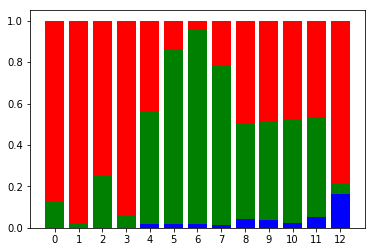

In [1217]:
import numpy as np
import matplotlib.pyplot as plt

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


#valeurs = {"p1":[0.4, 0.55, 0.05, 0.0], "p2":[0.2, 0.3, 0.5, 0.0], "p3":[0.4, 0.2, 0.2, 0.2], "p4":[0.2, 0.2, 0.2, 0.4], "p5":[0.4, 0.55, 0.05, 0.0], "p6":[0.4, 0.55, 0.05, 0.0], "p7":[0.4, 0.55, 0.05, 0.0]}
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','deeppink']

valeurs_freq = dict()
valeurs_prob = dict()

for x in range(0,number_of_slices):   # initialising values[timeperiod] = "list of freq" dictionaries
    valeurs_freq[x] = list()
    valeurs_prob[x] = list()


for x in range(0,number_of_slices):
    list_freq = list()
    list_prob = list()
    total_prob_slice = 0
    
    for sense in correl_pairs.keys():
        #print("\t\t",x,sense)
        list_freq.append(correl_pairs[sense][0][x])
        list_prob.append(correl_pairs[sense][1][x])
        total_prob_slice += correl_pairs[sense][1][x]  # this counts the total probability for Tx, for normalising
        
    valeurs_freq[x] = list_freq
    valeurs_prob[x] = list_prob
    for i in range(0,len(valeurs_prob[x])):
        valeurs_prob[x][i] = valeurs_prob[x][i]/total_prob_slice
    
print("freq")
for key in valeurs_freq:
    print(valeurs_freq[key])
    
print("prob")
for key in valeurs_prob:
    print(valeurs_prob[key])


#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs
    

#for key,vals in valeurs_freq.items():
#    print(key,vals)
    
#    for i in range(0,len(vals)):        
#        if i == 0:
#            previous = 0
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#        else:         
#            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#plt.xticks(range(len(valeurs_freq)), valeurs_freq.keys())

#plt.show()

#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs

previous = 0

for key,vals in valeurs_prob.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
plt.xticks(range(len(valeurs_prob)), valeurs_prob.keys())

plt.show()

## plotting expert

0 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lenght of vals 11
TOTAL HITS FOR SENSE harmonia-1 2
TOTAL HITS FOR SENSE NA 0
TOTAL HITS FOR SENSE harmonia-4.3 0
TOTAL HITS FOR SENSE harmonia-4.3β 0
TOTAL HITS FOR SENSE harmonia-4.3α 0
TOTAL HITS FOR SENSE harmonia-4.4 0
TOTAL HITS FOR SENSE harmonia-4.5 0
TOTAL HITS FOR SENSE harmonia-3 0
TOTAL HITS FOR SENSE harmonia-4.6 0
TOTAL HITS FOR SENSE harmonia-4.1 0
TOTAL HITS FOR SENSE harmonia-5 0
1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lenght of vals 11
TOTAL HITS FOR SENSE harmonia-1 0
TOTAL HITS FOR SENSE NA 0
TOTAL HITS FOR SENSE harmonia-4.3 0
TOTAL HITS FOR SENSE harmonia-4.3β 0
TOTAL HITS FOR SENSE harmonia-4.3α 0
TOTAL HITS FOR SENSE harmonia-4.4 0
TOTAL HITS FOR SENSE harmonia-4.5 0
TOTAL HITS FOR SENSE harmonia-3 0
TOTAL HITS FOR SENSE harmonia-4.6 0
TOTAL HITS FOR SENSE harmonia-4.1 0
TOTAL HITS FOR SENSE harmonia-5 0
2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lenght of vals 11
TOTAL HITS FOR SENSE harmonia-1 0
TOTAL HITS FOR SEN

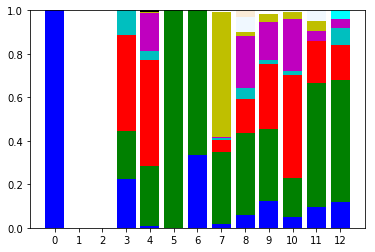

In [1223]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


valeurs = period_relative
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','magenta','peru']
#colours = ['b','g','r','c','m','y','k','w']
colors = couleurs

for key,vals in valeurs.items():
    print(key,vals)
    print("lenght of vals",len(vals))
    
    
    
    for i in range(0,len(vals)):        
        if i == 0:
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = 0
            #print(i)
            #print(colours[i],"height=",vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
        else:         
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = vals[i-1] + previous
            #print("i",i,"key=period",key)
            #print(colours[i],"height=",vals[i])
            #print(vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
plt.xticks(range(len(valeurs)), valeurs.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()